In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import matplotlib.pyplot as plt
import numpy as np

In [3]:
IMG_SIZE = 224
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = 224
IMG_CHANNEL = 3
BATCH_SIZE = 32
COLOR_MODE = 'rgb'

train_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Chest X-ray in India/aug-data/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    interpolation="bilinear",
    follow_links=False,
)

dev_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Chest X-ray in India/original-data/validation/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=123,
    interpolation="bilinear",
    follow_links=False,
)

test_set = image_dataset_from_directory(
    "/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Chest X-ray in India/original-data/test/",
    labels="inferred",
    label_mode="binary",
    class_names=None,
    color_mode=COLOR_MODE,
    batch_size=BATCH_SIZE,
    image_size=(IMG_SIZE, IMG_SIZE),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
)

Found 581 files belonging to 2 classes.
Found 20 files belonging to 2 classes.
Found 52 files belonging to 2 classes.


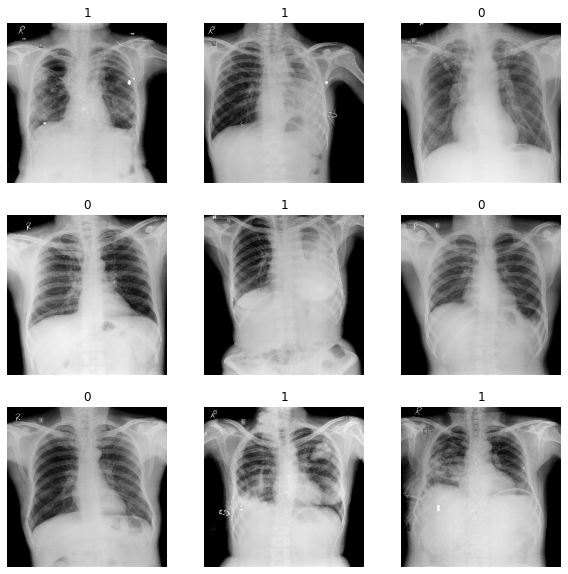

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dev_set.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(np.squeeze(images[i].numpy().astype("uint8")))
        plt.title(int(labels[i]))
        plt.axis("off")

In [6]:
!pip install livelossplot

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

monitor_val_acc = EarlyStopping(monitor = 'val_loss', 
                                patience = 5)

In [8]:
# VGG16

# VGG 16 pre-trained
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense

vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# breeze all VGG previous layers
for layer in vgg.layers:
	layer.trainable = False

flatten = Flatten()(vgg.layers[-1].output)
fc1 = Dense(128, activation='relu')(flatten)
out = Dense(1, activation='sigmoid')(fc1)

model = Model(inputs=vgg.inputs, outputs=out)
model.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

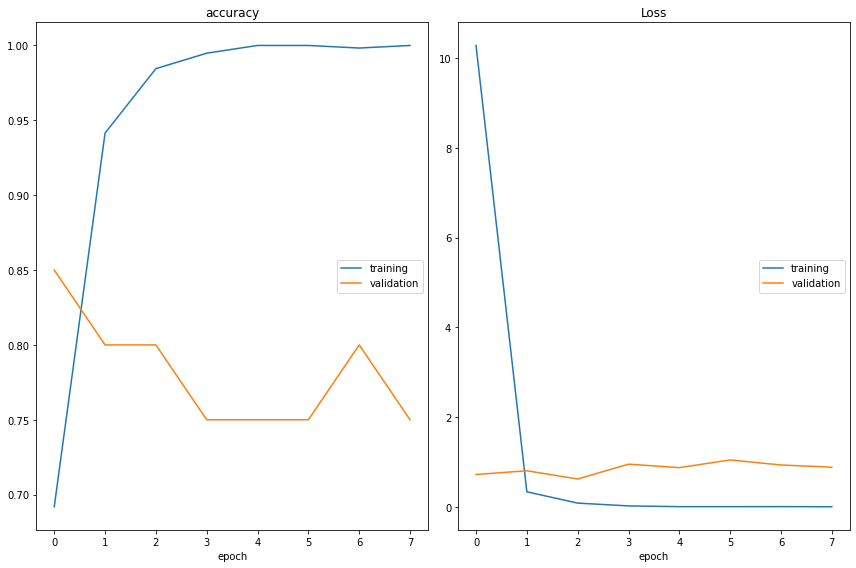

accuracy
	training         	 (min:    0.692, max:    1.000, cur:    1.000)
	validation       	 (min:    0.750, max:    0.850, cur:    0.750)
Loss
	training         	 (min:    0.001, max:   10.281, cur:    0.001)
	validation       	 (min:    0.619, max:    1.044, cur:    0.882)
19/19 [==============================] - 4s 154ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8821 - val_accuracy: 0.7500


In [9]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.fit(train_set, 
           epochs = 200,
           batch_size=1024,
           callbacks=[PlotLossesKeras(), monitor_val_acc],
           validation_data = dev_set)

In [10]:
model.save('/content/gdrive/MyDrive/Luận văn Cao học/Tuberculosis/Models/Models for India/model_vgg16.h5')